1) кластеризовать изображение

In [1]:
import seaborn as sns
from scipy import ndimage, misc
from numpy.random import choice
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from matplotlib.colors import ListedColormap


In [2]:
#Подготовка данных, вернет лист с кортежами (координаты пикселя, цвета по RGB)
def create_data(im):
    im_loaded = im.load()
    return [(x, y, im_loaded[x, y][0], im_loaded[x, y][1], im_loaded[x, y][2]) for x in range(im.size[0]) for y in range(im.size[1])]

2) удобно задать объект для поиска

In [17]:
#Находим выделяющийся кластер по цвету, например красный
def find_box_cluster(db):
    number = -1
    for center in db.cluster_centers_:
        number += 1
        if center[2] > 140 and center[2] < 255:
            if center[3] > 0 and center[3] < 60:
                if center[4] > 0 and center[4] < 100:
                    return number

In [4]:
#Делаем изображение серым
def get_gray(image_loaded, p):
    return (int((sum(image_loaded[p[0], p[1]]) - 255) / 3),
            int((sum(image_loaded[p[0], p[1]]) - 255) / 3),
            int((sum(image_loaded[p[0], p[1]]) - 255) / 3))

In [5]:
original = Image.open("leto1.png")
image = original.copy()

In [6]:
%%time
# кластеризация
image_loaded = image.load()
db = KMeans(n_clusters = 30)
data = create_data(image)
db_clusters = db.fit_predict(data)

Wall time: 1min 10s


In [7]:
# получение изображения для демонстрации кластеризации
clustered = original.copy()
clustered_loaded = clustered.load()
for p, c in zip(data, db_clusters):
    clustered_loaded[p[0], p[1]] = (int(db.cluster_centers_[c, 2]),
                                    int(db.cluster_centers_[c, 3]),
                                    int(db.cluster_centers_[c, 4]))

3) заданный объект нужно оставить цветным, остальное изображение сделать оттенками серого

In [8]:
#Все делаем серым, кроме выбранного кластера, его цвет оставляем таким же
def make_gray(image, image_loaded, db, db_clusters):
    data = create_data(image)
    center_number = find_box_cluster(db)
    for p, c in zip(data, db_clusters):
        if center_number != c:
            image_loaded[p[0], p[1]] = get_gray(image_loaded, p)

In [9]:
# раскрашивание в серый тон
make_gray(image, image_loaded, db, db_clusters)

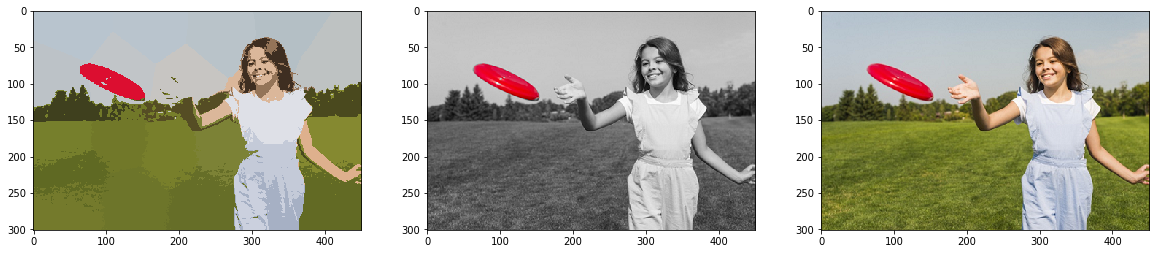

In [23]:
_, axes = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = (12, 8)

axes[0].imshow(clustered)
axes[1].imshow(image)
axes[2].imshow(original)

4) Кластеризовать новое изображение, обнаружить на нём заданный объект

In [18]:
%%time
# кластеризация
new_1_original = Image.open("leto2.jpg")
new_1_image = new_1_original.copy()
new_1_image_loaded = new_1_image.load()
new_1_db = KMeans(n_clusters = 30)
new_1_data = create_data(new_1_image)
new_1_db_clusters = new_1_db.fit_predict(new_1_data)

Wall time: 1min 33s


In [19]:
# получение изображения для демонстрации кластеризации
new_1_clustered = new_1_image.copy()
new_1_clustered_loaded = new_1_clustered.load()
for p, c in zip(new_1_data, new_1_db_clusters):
    new_1_clustered_loaded[p[0], p[1]] = (int(new_1_db.cluster_centers_[c, 2]),
                                          int(new_1_db.cluster_centers_[c, 3]),
                                          int(new_1_db.cluster_centers_[c, 4]))

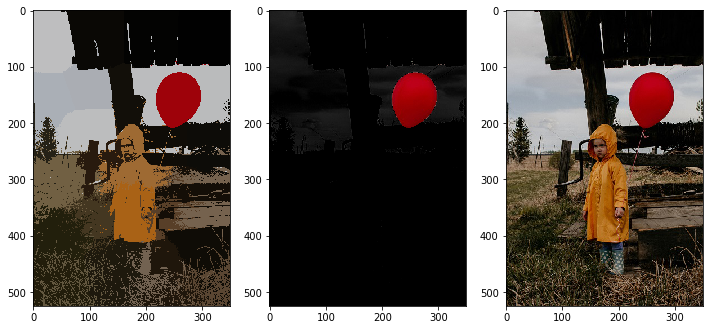

In [24]:
make_gray(new_1_image, new_1_image_loaded, new_1_db, new_1_db_clusters)
_, axes = plt.subplots(1, 3)

axes[0].imshow(new_1_clustered)
axes[1].imshow(new_1_image)
axes[2].imshow(new_1_original)

5) оформить всё в виде работоспособной программы